In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import plotly as py
import plotly.express as px
from matplotlib_inline.backend_inline import set_matplotlib_formats
set_matplotlib_formats('pdf', 'svg')


In [2]:
data = pd.read_csv("housing.csv")

In [3]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


## Data Exploration

In [4]:
#list down the column
data.keys()

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [5]:
#list down random samples of data
data.sample(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
8459,-118.35,33.90,32.0,1056.0,225.0,565.0,231.0,3.9485,230000.0,<1H OCEAN
4812,-118.37,34.02,44.0,1944.0,458.0,981.0,377.0,2.6154,193200.0,<1H OCEAN
13151,-121.53,36.85,23.0,3359.0,725.0,1862.0,651.0,2.6719,193600.0,INLAND
17118,-122.14,37.50,46.0,30.0,4.0,13.0,5.0,15.0001,500001.0,NEAR BAY
20577,-121.94,38.89,15.0,1462.0,314.0,774.0,271.0,2.5478,91700.0,INLAND
2268,-119.81,36.79,35.0,2314.0,443.0,954.0,457.0,2.9506,73800.0,INLAND
6162,-117.94,34.08,34.0,1970.0,476.0,1269.0,406.0,4.0640,201200.0,<1H OCEAN
2301,-119.78,36.82,25.0,5016.0,NaN,2133.0,928.0,3.6250,89500.0,INLAND
6849,-118.14,34.06,37.0,1339.0,258.0,706.0,238.0,4.7569,253800.0,<1H OCEAN
3039,-119.12,35.37,13.0,4527.0,713.0,2170.0,671.0,4.8266,146200.0,INLAND


In [6]:
#adding target_feature to Y
TARGET_FEATURE = 'median_house_value'
Y = data[TARGET_FEATURE]
Y.head(10)

0    452600.0
1    358500.0
2    352100.0
3    341300.0
4    342200.0
5    269700.0
6    299200.0
7    241400.0
8    226700.0
9    261100.0
Name: median_house_value, dtype: float64

In [7]:
#gives information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [8]:
#desribes the dataset. gives count, mean, std and box plot values
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [9]:
numeric_features = data.select_dtypes(['int', 'float']).columns
numeric_features , len(numeric_features)

(Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
        'total_bedrooms', 'population', 'households', 'median_income',
        'median_house_value'],
       dtype='object'),
 9)

In [10]:
categorical_features = data.select_dtypes('object').columns
categorical_features, len(categorical_features)

(Index(['ocean_proximity'], dtype='object'), 1)

In [11]:
print("Number of 'Numerical' Features are:", len(numeric_features) )
print("Number of 'Categorical' Features are:", len(categorical_features) )

Number of 'Numerical' Features are: 9
Number of 'Categorical' Features are: 1


Text(0, 0.5, 'Count')

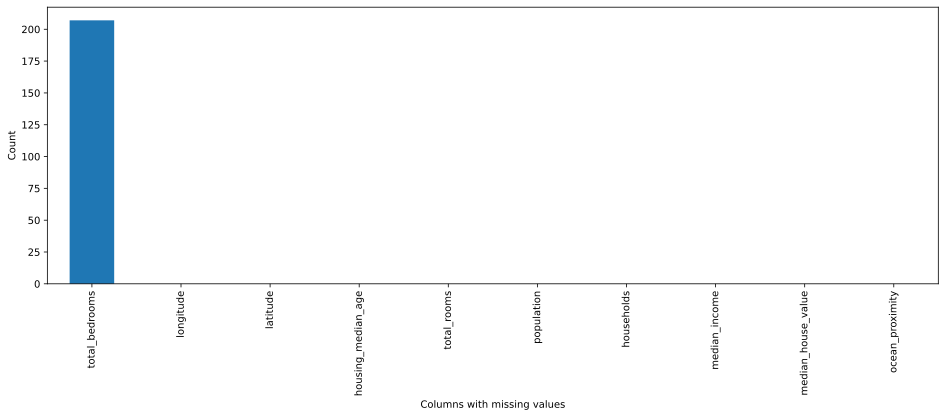

In [12]:
missing = data.isna().sum().sort_values(ascending=False)
missing.plot.bar(figsize=(16,5))
plt.xlabel('Columns with missing values')
plt.ylabel('Count')

In [13]:
missing

total_bedrooms        207
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [14]:
data[['total_bedrooms']].describe(include='all')

,total_bedrooms
count,20433.000000
mean,537.870553
std,421.385070
min,1.000000
25%,296.000000
50%,435.000000
75%,647.000000
max,6445.000000


In [15]:
data['total_bedrooms'] = data['total_bedrooms'].fillna(data['total_bedrooms'].mode()[0])
data.isna().any()

longitude             False
latitude              False
housing_median_age    False
total_rooms           False
total_bedrooms        False
population            False
households            False
median_income         False
median_house_value    False
ocean_proximity       False
dtype: bool

In [16]:
print("Total Records :", len(data) )
for col in categorical_features:
    print("Total Unique Records of "+ col + " =", len(data[col].unique()))

Total Records : 20640
Total Unique Records of ocean_proximity = 5


In [17]:
data[categorical_features].value_counts()

ocean_proximity
<1H OCEAN          9136
INLAND             6551
NEAR OCEAN         2658
NEAR BAY           2290
ISLAND                5
Name: count, dtype: int64

In [18]:
from sklearn.preprocessing import LabelEncoder
for column in categorical_features:
    l_encoder = LabelEncoder()
    data[column] = l_encoder.fit_transform(data[column])

In [19]:
data.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,3
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,3
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,3
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,3
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,3
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,3
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,3
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,3


In [20]:
training_features = list(numeric_features) + list(categorical_features)
# Remove 'Price' Feature from list
training_features.remove('median_house_value')
# Final list of Training Features
training_features

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'ocean_proximity']

In [21]:
from sklearn.preprocessing import MinMaxScaler
minMaxNorm = MinMaxScaler()
minMaxNorm.fit(data[training_features])
X = minMaxNorm.transform(data[training_features])
X

array([[0.21115538, 0.5674814 , 0.78431373, ..., 0.02055583, 0.53966842,
        0.75      ],
       [0.21215139, 0.565356  , 0.39215686, ..., 0.18697583, 0.53802706,
        0.75      ],
       [0.21015936, 0.5642933 , 1.        , ..., 0.02894261, 0.46602805,
        0.75      ],
       ...,
       [0.31175299, 0.73219979, 0.31372549, ..., 0.07104095, 0.08276438,
        0.25      ],
       [0.30179283, 0.73219979, 0.33333333, ..., 0.05722743, 0.09429525,
        0.25      ],
       [0.30976096, 0.72582359, 0.29411765, ..., 0.08699227, 0.13025338,
        0.25      ]])

In [22]:
Y = data['median_house_value']
Y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20640, dtype: float64

In [23]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size=0.2)
print("Total size: ", data.shape[0])
print("Train size: ", train_X.shape, train_Y.shape)
print("Test size: ", test_X.shape, test_Y.shape)

Total size:  20640
Train size:  (16512, 9) (16512,)
Test size:  (4128, 9) (4128,)


In [24]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

In [25]:
ADB_model = AdaBoostRegressor(n_estimators=400, learning_rate=0.25)
ADB_model.fit(train_X,train_Y)
y_train = ADB_model.predict(train_X)
print("The train accuracy score : {} ".format(r2_score(train_Y, y_train)))
y_adb_predict = ADB_model.predict(test_X)
print("The test accuracy score : {} ".format(r2_score(test_Y, y_adb_predict)))
score = ADB_model.score(test_X, test_Y)
score

The train accuracy score : 0.34710644960910475 
The test accuracy score : 0.34480518420486217 


0.34480518420486217

In [26]:
models_summary = pd.DataFrame([],
columns=['Model_name',
'Prediction_Score',
'Mean_Absolute_error'
])
models_summary
mae = mean_absolute_error(test_Y, y_adb_predict)

models_summary = models_summary._append({
'Model_name': ADB_model.__class__.__name__,
'Prediction_Score': r2_score(test_Y, y_adb_predict),
'Mean_Absolute_error': mae,
}, ignore_index=True)
models_summary.sort_values('Prediction_Score', ascending=False)




C:\Users\USER\AppData\Local\Temp\ipykernel_18468\604353604.py:9: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  models_summary = models_summary._append({


,Model_name,Prediction_Score,Mean_Absolute_error
0,AdaBoostRegressor,0.344805,82758.127957


In [27]:
print(type(models_summary))


<class 'pandas.core.frame.DataFrame'>


In [28]:
Dtree_model = DecisionTreeRegressor(random_state=1, max_depth=6, min_samples_split=6)
Dtree_model.fit(train_X, train_Y)
y_train = Dtree_model.predict(train_X)
print("The train accuracy score : {} ".format(r2_score(train_Y, y_train)))
y_dtree_predict = Dtree_model.predict(test_X)
print("The test accuracy score : {} ".format(r2_score(test_Y, y_dtree_predict)))

The train accuracy score : 0.6920080695081253 
The test accuracy score : 0.6695608292624233 


In [29]:
models_summary = models_summary._append({
'Model_name': Dtree_model.__class__.__name__,
'Prediction_Score': r2_score(test_Y, y_dtree_predict),
'Mean_Absolute_error' : mean_absolute_error(test_Y, y_dtree_predict)
}, ignore_index=True)
models_summary.sort_values('Prediction_Score', ascending=False)

,Model_name,Prediction_Score,Mean_Absolute_error
1,DecisionTreeRegressor,0.669561,47286.797086
0,AdaBoostRegressor,0.344805,82758.127957


In [30]:
GBR_model = GradientBoostingRegressor(n_estimators=250, random_state=1, learning_rate=0.27, max_depth=6, min_samples_split=6)
GBR_model.fit(train_X, train_Y)
y_train = GBR_model.predict(train_X)
print("The train accuracy score : {} ".format(r2_score(train_Y, y_train)))
y_gbr_predict = GBR_model.predict(test_X)
print("The test accuracy score : {} ".format(r2_score(test_Y, y_gbr_predict)))

The train accuracy score : 0.9719539877147552 
The test accuracy score : 0.8260700253466303 


In [31]:
models_summary = models_summary._append({
'Model_name': GBR_model.__class__.__name__,
'Prediction_Score': r2_score(test_Y, y_gbr_predict),
'Mean_Absolute_error' : mean_absolute_error(test_Y, y_gbr_predict)
}, ignore_index=True)
models_summary.sort_values('Prediction_Score', ascending=False)

,Model_name,Prediction_Score,Mean_Absolute_error
2,GradientBoostingRegressor,0.826070,31811.419247
1,DecisionTreeRegressor,0.669561,47286.797086
0,AdaBoostRegressor,0.344805,82758.127957


In [32]:
RFR_model = RandomForestRegressor(random_state=1,n_estimators=250, max_depth=18, min_samples_split=4)
RFR_model.fit(train_X, train_Y)
y_train = RFR_model.predict(train_X)
print("The train accuracy score : {} ".format(r2_score(train_Y, y_train)))
y_rfr_predict = RFR_model.predict(test_X)
print("The test accuracy score : {} ".format(r2_score(test_Y, y_rfr_predict)))

The train accuracy score : 0.9632070248288067 
The test accuracy score : 0.8176086463768932 


In [33]:
models_summary = models_summary._append({'Model_name': RFR_model.__class__.__name__,'Prediction_Score': r2_score(test_Y, y_rfr_predict),'Mean_Absolute_error' : mean_absolute_error(test_Y, y_rfr_predict)}, ignore_index=True)
models_summary.sort_values('Prediction_Score', ascending=False)

,Model_name,Prediction_Score,Mean_Absolute_error
2,GradientBoostingRegressor,0.826070,31811.419247
3,RandomForestRegressor,0.817609,32083.442834
1,DecisionTreeRegressor,0.669561,47286.797086
0,AdaBoostRegressor,0.344805,82758.127957


In [ ]:
XGBR_model = XGBRegressor(n_estimators=300, learning_rate=0.15, max_depth=6)
XGBR_model.fit(train_X, train_Y)
y_train = XGBR_model.predict(train_X)
print("The train accuracy score : {} ".format(r2_score(train_Y, y_train)))
y_xgbr_predict = XGBR_model.predict(test_X)
print("The test accuracy score : {} ".format(r2_score(test_Y, y_xgbr_predict)))

In [ ]:
models_summary = models_summary._append({
'Model_name': XGBR_model.__class__.__name__,
'Prediction_Score': r2_score(test_Y, y_xgbr_predict),
'Mean_Absolute_error' : mean_absolute_error(test_Y, y_xgbr_predict)
}, ignore_index=True)
models_summary.sort_values('Prediction_Score', ascending=False)

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
xgbr_model = XGBRegressor() # {'objective': 'reg:squarederror' }
params = {
'n_estimators': [110, 120, 130, 140],
'learning_rate': [ 0.05, 0.075, 0.1],
'max_depth': [ 7, 9],
'reg_lambda': [0.3, 0.5]
}
xgb_reg = GridSearchCV(estimator=xgbr_model, param_grid=params, cv=5, n_jobs=-1)
xgb_reg.fit(train_X, train_Y)
xgbr_model_score = xgb_reg.best_score_
xgbr_model_pred = xgb_reg.predict(test_X)
mae = mean_absolute_error(test_Y, xgbr_model_pred)
print("Best score: %0.3f 0.3f" % xgb_reg.best_score_)
print("Best parameters set:", xgb_reg.best_params_)
print("mean_absolute_error :", mae)

In [ ]:
models_summary = models_summary._append({
'Model_name': 'XGBRegressor_HyperParamsTunning',
'Prediction_Score': xgbr_model_score,
'Mean_Absolute_error' : mae
}, ignore_index=True)
models_summary.sort_values('Prediction_Score', ascending=False)

In [ ]:
import plotly.express as ex
ex.pie(data,names='ocean_proximity',title='Proportion of Locations of the house w.r.t ocean/sea')

In [ ]:
from pandas.plotting import scatter_matrix
sct_features = ["median_house_value", "median_income","total_rooms","housing_median_age"]
scatter_matrix(data[sct_features],figsize=(12,8))

In [ ]:
from plotly.subplots import make_subplots
import plotly.graph_objs as go
fig = make_subplots(1,2)
fig.add_trace(go.Histogram(x=data['median_house_value']),1,1)
fig.add_trace(go.Box(y=data['median_house_value'],boxpoints='all',line_color='orange'),1,
2)
fig.update_layout(height=500, showlegend=False,title_text="Median income distribution and Box Plot")

In [ ]:
corr_mat = data[['housing_median_age','total_rooms','total_bedrooms','population','households']].corr()
f, ax = plt.subplots(figsize=(30, 15))
sns.heatmap(corr_mat, vmax=1 , square=True,annot=True,linewidths=.5);

In [ ]:
data.plot(kind="scatter", x="longitude", y = "latitude", alpha=.05)